# Retail Price Analysis

In [3]:
import pandas as pd # to data manipulation and data loading
import numpy as np # for mathematical calulation
import matplotlib.pyplot as plt # to visulization
%matplotlib inline
import seaborn as sns  # used for advanced visulization
from ydata_profiling import ProfileReport # create profile report

In [4]:
df=pd.read_csv("C:\\Users\\Abc\\Downloads\\retail_price.csv") # load csv file

In [5]:
df.head() # get first 5 rows

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
df.tail() # get last 5 rows

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [7]:
df.info()  # to get inforamtion of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [8]:
df.isnull().sum() #  check missing values

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [9]:
# to convert the month date into datetime errors=coerce for to convert forcefully 
df['month_year']=pd.to_datetime(df['month_year'],errors='coerce') 

In [10]:
df.info() # check data type after convert the date time format. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

In [11]:
df.nunique() # to check unique values in each column

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

1. product_id: There are 52 unique id are present.
2. product_category_name: In this column total 9 unique names are show.
3. month_year: There  are 20 unique date are available.
4. qty: 66 unique quantities.
5. total_price: There are 573 unique total price.
6. freight_price: In this column total 653 unique shipping prices.
7. unit_price:  There are 280 unit price are present.
8. product_name_lenght: 24 unique length are available.
9. product_description_lenght: 46 unique description length are avialable.
10. product_photos_qty: There are 7 unique photos qty are present.
11. product_weight_g:  The 45 unique values are present.
12. product_score: There are total 11 unique product score shown in this column.
13. customers:  Total 94 customers.
14. weekday: 4 weekdays are present.
15. weekend: 3 weekend are present.
16. holiday:  Total 5 holidays are available.
17. month:  There are 12 months.
18. year:  There are 2 unique year are shown in this column.
19. S: Total 450 unique seasonalitites are present.
20. volume: 40 volumne is give.
21. comp_1: There is 88 unique values are present in this column.
22. ps1: There are 9 unique product ratio for compititer first.
23. fp1:  This shows the 179 unique freight price .
24. comp_2: There is 123 unique values are present in this column.
25. ps2:  There are  total 10 unique product prices are represent.
26. fp2: 242 unique price are present.
27. comp_3: 105 unique values in compititer 3.
28. ps3: 9 unique values are present.
29. fp3: There are total 229 unique values are present in this column.
30. lag_price:  In this column total 307 unique lag price.

In [13]:
df.shape # to check rows and column

(676, 30)

- There are 676 rows and 30 columns are present. 

In [15]:
df.duplicated().sum() # to get total count of duplicates values

0

- This dataset dose not contain any duplicate values.

In [17]:
df.columns # to show column name

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [18]:
# rename the column names
df.rename(columns={'product_id':'Product_ID','product_category_name':'Product_Name','month_year':'Date','qty':'Quantity','total_price':'Total_Price','freight_price':'Freight_Price','unit_price':'Unit_Price','product_name_length':'Product_Name_Len','product_description_len':'Product_Description_Len',
                  'product_photos_qty':'Product_Photos_Quantity','product_weight_g':'Product_Weigth_gram','product_score':'Product_score','customres':'Customers',
                  'weekday':'Weekday','weekend':'Weekend','holiday':'Holiday','month':'Month','year':'Year','s':'Seasonality','volume':'Volume','comp1':'Comp1','ps1':'Ps1','fp1':'Fp1',
                  'comp_2':'Comp2','ps2':'Ps2','fp2':'Fp2','comp_3':'Comp3','ps3':'Ps3','fp3':'Fp3','lag_price':'Lag_on_Price'},inplace=True) 

- **Product_ID** : Unique identifier for each product.
- **Product_Name** : Name or category of the product.
- **Product_Name_Len**:	Length of the product name (likely number of characters).
- **Product_Description_Len**: Length of the product description (number of characters or words).
- **Product_Photos_Quantity** : Number of photos available for the product.
- **Product_Weigth_gram** : Weight of the product in grams.
- **Unit_Price**: Price per unit of the product.
- **Total_Price** :	Total price for the product (Unit Price × Quantity).
- **Freight_Price**: Shipping cost for the order.
- **Product_score** : Product review or rating score (usually out of 5).
- **Customers**	:Customer identifier or count (might be number of unique customers per record).
- **Quantity** : Number of product units sold.
- **Volume**: volume of product.
- **Date** : product sold  date (typically month and year combined).
- **Weekday**: Product sold on a weekday.
- **Weekend**: The product sold on a weekend.
- **Holiday** : The product sold date was a public holiday.
- **Month**: Month of the product sold.
- **Year** : Year of the product sold.
- **Seasonality** : Season classification (e.g., Winter, Spring) or a seasonality index.
- **lag price** : The product price from previous day/week/month.         
- **Comp1**, **Comp2**, **Comp3** : Competitor  of retail sale.
- **Ps1**,**Ps2**,**Ps3** : Product rating.
- **Fp1**,**Fp2**,**Fp3**  : Freight_price(shipping price).
    

In [20]:
df.describe(include='all') # get summary 

,Product_ID,Product_Name,Date,Quantity,Total_Price,Freight_Price,Unit_Price,product_name_lenght,product_description_lenght,Product_Photos_Quantity,...,comp_1,Ps1,Fp1,Comp2,Ps2,Fp2,Comp3,Ps3,Fp3,Lag_on_Price
count,676,676,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,52,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,health5,garden_tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017-07-16 20:54:40.473372928,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
min,NaN,NaN,2017-01-01 00:00:00,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,NaN,NaN,2017-01-09 00:00:00,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,NaN,NaN,2018-01-01 00:00:00,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,NaN,NaN,2018-01-04 00:00:00,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,NaN,NaN,2018-01-08 00:00:00,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


**1.Date**
- The Total record in date column are 676.
- The average date is 2017-07-16.
- The minimum product sold date is 2017-01-01.
- 25% product sold on 2017-01-09 .
- 50% the middle value/product are sold on 2018-01-01.
- 75% product sold on 2018-01-04 this date.
- maximum product sold on 2018-01-08 this date.

**2.Quantity**
- There are 676 entries in this column i.e no any missing values are present.
- The average quantity ordered is approximately 14.5 units.
- The minimum quantity ordered is 1 unit.
- The maximum quantity is 122 units.
- The 25 % value is 4 that show the there below vaules are 25 % of the data fall.
- The middle quantity of this column is 10.
- 75 % of the 18 which is greater than median and 25%(Q1). 

**3.Total_Price**
- The count of total price is 676.
- The average of this column is 1422.70 .
- The minimum total price is 19.
- The maximum total price of product is 12095.
- Standard deviation is of this column is 1700.
- The 25 % value is 333.7 that show the there below vaules are 25 % of the data fall.
- The mid total price is 807.
- 75 % of the 1887 which is greater than median and 25%(Q1).

**4.Freight_Price**
- The total count of freight price(shipping price) of product is 676.
- The mean/average of this column is 20.68 i.e the average around 21.
- The minimum shpping price of product is 0.
- Maximum shipping price of that product is 79.76 .that around 80.
- Standard deviation is 10.
- The 25 % value is 14 that show the there below vaules are 25 % of the data fall.
- The middle value of this column  is 17.
- 75 % of the 22.17 which is greater than median and 25%(Q1).

**5.Unit_Price**
- The entries of unit_price/sold price is 676.
- The average of sold price of product 106.49, the total average around 107.
- The lowest unit price is 19.
- The maximum unit price is 364.
- The standard deviation of this column is 76.
- The 25 % value is 53 that show the there below vaules are 25 % of the data fall.
- The middle value of this column is 89.
- 75 % of the 129.99 i.e 130  which is greater than median and 25%(Q1).

**6.product_name_lenght**
- All product have there length. so total 676 product legth are present.
- The average lenth of product name is 48.
- The minimum length of that product name is 29 charecter.
- The maximum length of product name is 60 charecter.
- Standard deviation is 9.
- The 25 % value is 40 that show the there below vaules are 25 % of the data fall.
- The middle charecter length is 51.
- 75 %  length of the 51 charecter which is greater than median and 25%(Q1).

**7.product_description_length**
- There are 676 entires of product description length.
- The average description length of product is 767.
- The minimum description length  of product is 100.
- The maximum description length is 3006.
- Standard deviation of this column is 655.
- The 25 % value is 339 charecter that show the there below vaules are 25 % of the data fall.
- The middle charecter length of product description 501.
- 75 %  length of the 903 charecter which is greater than median and 25%(Q1).

**8.Product_Photos_Quantity**
- The total count product photos quantity are 676.
- The average photo quantity of product is 2.
- The minimum photos quantity is 1.
- The highest photo quantity of product to sold is 8.
- The standard deviation is 1.42.
- The 25 % value is 1 quantity that show the there below vaules are 25 % of the data fall.
- The middle value of this column  1.50.
- 75 %  length of the 2 photos sold  which is greater than median and 25%(Q1).

**9.Product_Weigth_gram**
- Total 676 count of product weigth in gram.
- The average of weigth in gram of product is 1847g.
- The minimum weigth of product is 100g.
- The maximum weigth of product is 1850g.
- Standard deviation of this column is 9750.
- The 25% product are whose weigth is 348g.
- The 50% product who have 950g weigth.
- The 75% record whose weigth is 1850g.

**10.Product_score**
- There are 676 entries in this column.
- The average product rating/score is 4.
- The lowest product score is 3.
- The highest product score is 4.
- The standard deviation is 4.50.
- The 25% record/product whose rating is 3.90.
- The 50% record middle rating value is 4.10.
- The 75% product who have 4.20.

**11.comp_1**
- The total count of first compititer is 676.
- The average around for this compititer is 79.
- The lowest comp_1 is 19.
- The highest comp_1 is 394.
- The standard deviation of this column is 47.93 i.e 48. which is less than mean
- 25% (Q1) values are 49.91.
- 50% (middle) value is 69.90 i.e 70.
- 75% (Q3) value is 104.

**12.Ps1**
- The total count of product ratio for first compititer is 676.
- The average product ratio is 4.15.
- The minimum product rate for first compititer is 3.70.
- The maximum product rate for first compititer is 4.50.
- The standard deviation of this column is 0.12.
- 25% product ratio of first compititer values are 4.100.
- Middle values is 4.20.
- 75% values  whose product ratio is 4.20.

**13.Fp1**
- The total count of freight price of first compititer is 676.
- The average  Freight price first compititre is 18.59.
- The minimum price is 0.095.
- The maximum price is 57.23.
- The standard deviation is 9.40.
- 25% record whose freight price for first compititer is 13.82.
- The middle values is 16.61.
- 75% record whose freight price for first compititer is 19.73.

**14.comp_2**
- The total count of second compititer is 676.
- The average around for this compititer is 92.
- The lowest comp_2 is 19.90.
- The highest comp_2 is 394.
- The standard deviation of this column is 49.48 i.e 48. which is less than mean
- 25% (Q1) values are 53.90.
- 50% (middle) value is 89.990 i.e 90.
- 75% (Q3) value is 117.

**15.Ps2**
- The total count of product ratio for second compititer is 676.
- The average product ratio is 4.12.
- The minimum product rate for second compititer is 3.30.
- The maximum product rate for second compititer is 4.40.
- The standard deviation of this column is 0.20.
- 25% product ratio of second compititer values are 4.100.
- Middle values is 4.20.
- 75% values  whose product ratio is 4.20.

**13.Fp2**
- The total count of freight price of second compititer is 676.
- The average  Freight price second compititre is 18.62.
- The minimum price is 4.41.
- The maximum price is 57.23.
- The standard deviation is 6.424.
- 25% record whose freight price for second compititer is 14.48.
- The middle values is 16.81.
- 75% record whose freight price for second compititer is 21.66.

**11.comp_3**
- The total count of third compititer is 676.
- The average around for this compititer is 84.
- The lowest comp_3 is 19.
- The highest comp_3 is 255.
- The standard deviation of this column is 47.74 i.e 47. which is less than mean
- 25% (Q1) values are 53.
- 50% (middle) value is 59.90 i.e 60.
- 75% (Q3) value is 99.990 i.e 100.

**12.Ps3**
- The total count of product ratio for third compititer is 676.
- The average product ratio is 4.
- The minimum product rate for third compititer is 3.50.
- The maximum product rate for third compititer is 4.40.
- The standard deviation of this column is 0.233.
- 25% product ratio of third compititer values are 3.90.
- Middle values is 4.
- 75% values  whose product ratio is 4.10.

**13.Fp3**
- The total count of freight price of third compititer is 676.
- The average  Freight price third compititre is 17.96.
- The minimum price is 7.67.
- The maximum price is 57.23.
- The standard deviation is 5.53.
- 25% record whose freight price for third compititer is 15.
- The middle values is 16.51.
- 75% record whose freight price for third compititer is 19.477.

**14.Lag_on_Price**
- Total  count oflag price is 676.
- Average price is 107.
- The lowest lag on price is 19.
- The highest lag on price is 364.
- The standard deviation is 76.97.
- 25% value is 55.
- middle value is 89.
- 75 % value is 129.990 i.e around is 130.

**15.Product_ID**
- The count of total ID are 676  they have each unique id.
- They have 52 unique values are present.
- The Top most ID is health5.
- health5 this id is 20 times reapeated.

**16.Product_Name**
- There are total 676 product are present.
- They have 9 nunique names are present.
- The top most/popular name is garden_tools.
- This is 160 times are repeated.

In [22]:
df.columns # check column after that rename it

Index(['Product_ID', 'Product_Name', 'Date', 'Quantity', 'Total_Price',
       'Freight_Price', 'Unit_Price', 'product_name_lenght',
       'product_description_lenght', 'Product_Photos_Quantity',
       'Product_Weigth_gram', 'Product_score', 'customers', 'Weekday',
       'Weekend', 'Holiday', 'Month', 'Year', 'Seasonality', 'Volume',
       'comp_1', 'Ps1', 'Fp1', 'Comp2', 'Ps2', 'Fp2', 'Comp3', 'Ps3', 'Fp3',
       'Lag_on_Price'],
      dtype='object')

In [23]:
df['Weekday'].unique()  # check unique value weekday column

array([23, 22, 21, 20], dtype=int64)

- there are 4 unique value is present in this column.

In [25]:
df['Weekend'].unique() # check unique value weekend column

array([ 8, 10,  9], dtype=int64)

- There are 3 unique value are present.

In [27]:
df['Quantity'].unique()

array([  1,   3,   6,   4,   2,  11,  19,  18,  17,  13,   5,   8,  20,
        10,   7,   9,  14,  24,  28,  16,  21,  29,  27,  12,  23,  43,
        33,  32,  26,  36,  69,  44,  39,  48,  25,  15,  57,  45,  31,
        87,  35,  22,  51,  52,  38,  37,  91,  46,  56,  58,  50,  82,
        40,  85, 114,  76,  30,  34,  60,  47, 122,  65,  83,  92,  71,
        59], dtype=int64)

In [28]:
df['product_name_lenght'].unique() # to count the  unique values in product name lenght

array([39, 36, 49, 57, 48, 40, 50, 54, 59, 33, 56, 35, 58, 29, 45, 51, 42,
       55, 47, 41, 44, 60, 46, 38], dtype=int64)

In [29]:
df['Holiday'].unique()

array([1, 2, 4, 3, 0], dtype=int64)

In [30]:
df['Product_Name'].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

- 'bed_bath_table', 'garden_tools', 'consoles_games','health_beauty', 'cool_stuff', 'perfumery','computers_accessories', 'watches_gifts', 'furniture_decor this unique product name are present.

In [32]:
# shows the all record whose product name is garden tools
df[df['Product_Name'] == 'garden_tools'] 

,Product_ID,Product_Name,Date,Quantity,Total_Price,Freight_Price,Unit_Price,product_name_lenght,product_description_lenght,Product_Photos_Quantity,...,comp_1,Ps1,Fp1,Comp2,Ps2,Fp2,Comp3,Ps3,Fp3,Lag_on_Price
16,garden5,garden_tools,2017-01-03,6,419.40,32.680000,69.900000,36,450,1,...,69.900000,4.1,32.680000,69.900000,4.1,32.680000,69.900000,4.1,32.680000,69.850000
17,garden5,garden_tools,2017-01-04,3,247.90,34.216667,82.633333,36,450,1,...,82.633333,4.1,34.216667,82.633333,4.1,34.216667,82.633333,4.1,34.216667,69.900000
18,garden5,garden_tools,2017-01-05,20,1956.00,39.897500,97.588235,36,450,1,...,59.900000,4.1,19.732500,59.900000,4.2,26.246667,97.588235,4.1,39.897500,82.633333
19,garden5,garden_tools,2017-01-06,8,712.00,40.801250,89.000000,36,450,1,...,59.900000,4.1,17.670000,59.900000,4.2,16.260000,89.000000,4.1,40.801250,97.588235
20,garden5,garden_tools,2017-01-07,10,890.00,39.156000,89.000000,36,450,1,...,59.900000,4.1,16.626429,59.900000,4.2,16.111579,59.900000,4.1,15.392308,89.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,garden1,garden_tools,2018-01-04,5,550.00,42.726000,110.000000,58,1893,1,...,53.900000,4.1,5.281739,53.900000,4.2,19.468462,53.900000,4.1,19.071429,110.000000
564,garden1,garden_tools,2018-01-05,2,220.00,32.230000,110.000000,58,1893,1,...,53.415152,4.1,10.753036,53.709524,4.2,13.510345,53.057895,4.1,12.980000,110.000000
565,garden1,garden_tools,2018-01-06,6,539.94,48.178333,89.990000,58,1893,1,...,49.900000,4.1,19.890833,49.900000,4.2,23.251667,49.900000,4.1,22.878667,110.000000
566,garden1,garden_tools,2018-01-07,7,699.93,43.680000,99.990000,58,1893,1,...,49.910000,4.1,28.373333,49.900000,4.2,33.281429,49.900000,4.1,20.990000,89.990000


In [33]:
# Number of movies with same title

df['Product_Name'].duplicated().sum()

667

- There are 667 duplicate values are present in this column

In [35]:
df.sort_values(by="Unit_Price",ascending=False) # sort the unit price by ascending order

,Product_ID,Product_Name,Date,Quantity,Total_Price,Freight_Price,Unit_Price,product_name_lenght,product_description_lenght,Product_Photos_Quantity,...,comp_1,Ps1,Fp1,Comp2,Ps2,Fp2,Comp3,Ps3,Fp3,Lag_on_Price
356,health5,health_beauty,2018-01-06,11,4004.0,32.697273,364.00,51,625,1,...,23.99,4.3,16.270000,79.990000,4.1,13.362308,58.99,3.9,16.430000,352.250000
357,health5,health_beauty,2018-01-07,11,4004.0,36.246364,364.00,51,625,1,...,23.99,4.3,18.810000,79.990000,4.1,16.745000,58.99,3.9,7.670000,364.000000
358,health5,health_beauty,2018-01-08,9,3276.0,28.551111,364.00,51,625,1,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,364.000000
355,health5,health_beauty,2018-01-05,10,3513.1,38.570000,352.25,51,625,1,...,23.99,4.3,7.988571,79.990000,4.1,21.943125,58.99,3.9,9.422500,349.900000
350,health5,health_beauty,2017-01-12,7,2449.3,29.092857,349.90,51,625,1,...,23.99,4.3,12.456842,89.990000,4.1,15.894737,58.99,3.9,16.332222,322.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,consoles1,consoles_games,2017-01-08,24,477.6,16.163750,19.90,49,100,4,...,19.90,4.2,16.163750,19.900000,3.9,15.832727,19.90,4.2,16.163750,19.900000
329,consoles2,consoles_games,2017-01-07,1,19.9,11.850000,19.90,56,237,3,...,19.90,4.2,13.473077,19.900000,3.9,11.850000,19.90,3.9,11.850000,19.850000
330,consoles2,consoles_games,2017-01-08,11,218.9,15.832727,19.90,56,237,3,...,19.90,4.2,16.163750,19.900000,3.9,15.832727,19.90,3.9,15.832727,19.900000
331,consoles2,consoles_games,2017-01-09,9,179.1,15.411111,19.90,56,237,3,...,19.90,4.2,16.133333,19.900000,3.9,15.411111,19.90,3.9,15.411111,19.900000


In [36]:
# show the values whose unit price is 0 or total price is 0 or freight price is also 0 and product name is cool stuff
df[(df['Unit_Price']== 0)  | (df['Total_Price']==0)  | (df['Freight_Price'] == 0) & (df['Product_Name']=='cool_stuff')]

,Product_ID,Product_Name,Date,Quantity,Total_Price,Freight_Price,Unit_Price,product_name_lenght,product_description_lenght,Product_Photos_Quantity,...,comp_1,Ps1,Fp1,Comp2,Ps2,Fp2,Comp3,Ps3,Fp3,Lag_on_Price


In [37]:
df['Product_Name'].value_counts()

Product_Name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64

In [38]:
df['Product_ID'].value_counts()

Product_ID
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count, dtype: int64

In [39]:
df.groupby("Product_Name")["Total_Price"].mean() # to create group

Product_Name
bed_bath_table           1558.762623
computers_accessories    2059.390580
consoles_games            263.668182
cool_stuff               1016.777193
furniture_decor          1185.940833
garden_tools             1022.390875
health_beauty            1633.917231
perfumery                 781.250769
watches_gifts            2015.360874
Name: Total_Price, dtype: float64

In [40]:
df[df['Quantity'] > 10] # filtring the data where product quantity > 10

,Product_ID,Product_Name,Date,Quantity,Total_Price,Freight_Price,Unit_Price,product_name_lenght,product_description_lenght,Product_Photos_Quantity,...,comp_1,Ps1,Fp1,Comp2,Ps2,Fp2,Comp3,Ps3,Fp3,Lag_on_Price
6,bed1,bed_bath_table,2017-01-11,11,445.85,15.832727,40.531818,39,161,2,...,89.900,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
8,bed1,bed_bath_table,2018-01-01,19,759.81,16.533684,39.990000,39,161,2,...,86.900,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,2018-01-02,18,719.82,13.749444,39.990000,39,161,2,...,86.900,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000
10,bed1,bed_bath_table,2018-01-03,17,679.83,16.462353,39.990000,39,161,2,...,86.900,3.9,19.982353,39.990000,4.0,16.462353,39.990000,4.0,16.462353,39.990000
11,bed1,bed_bath_table,2018-01-04,13,519.87,14.236154,39.990000,39,161,2,...,85.045,3.9,12.940000,39.990000,4.0,14.236154,39.990000,4.0,14.236154,39.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,bed4,bed_bath_table,2018-01-01,19,872.10,14.182105,45.900000,38,735,5,...,86.900,3.9,19.383529,45.900000,4.2,14.182105,39.990000,4.0,16.533684,45.900000
665,bed4,bed_bath_table,2018-01-02,16,734.40,12.172500,45.900000,38,735,5,...,86.900,3.9,19.209091,45.900000,4.2,12.172500,39.990000,4.0,13.749444,45.900000
673,bed5,bed_bath_table,2017-01-07,59,12095.00,22.195932,205.000000,56,162,5,...,89.900,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
674,bed5,bed_bath_table,2017-01-08,52,10375.00,19.412885,199.509804,56,162,5,...,89.900,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000


In [41]:
df.loc[:,["Product_Name","Total_Price"]] # this is shows only Selected column  values

,Product_Name,Total_Price
0,bed_bath_table,45.95
1,bed_bath_table,137.85
2,bed_bath_table,275.70
3,bed_bath_table,183.80
4,bed_bath_table,91.90
...,...,...
671,bed_bath_table,215.00
672,bed_bath_table,2090.00
673,bed_bath_table,12095.00
674,bed_bath_table,10375.00


# Univariate Analysis

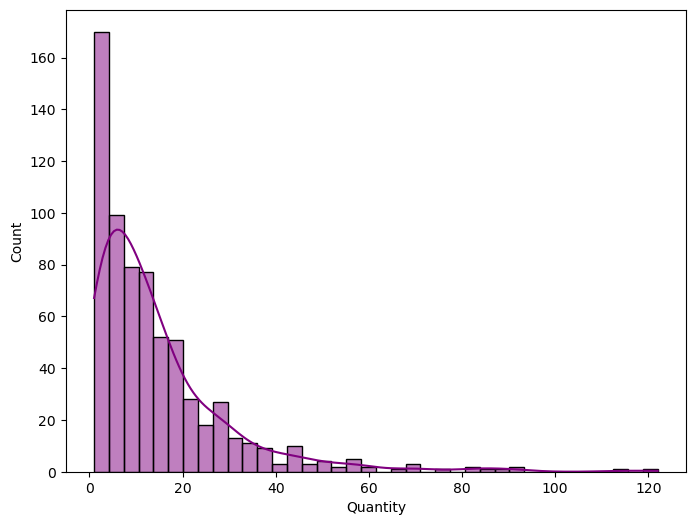

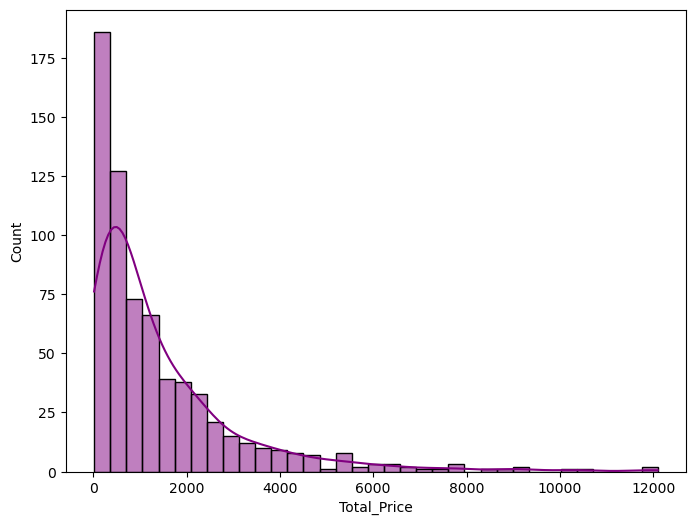

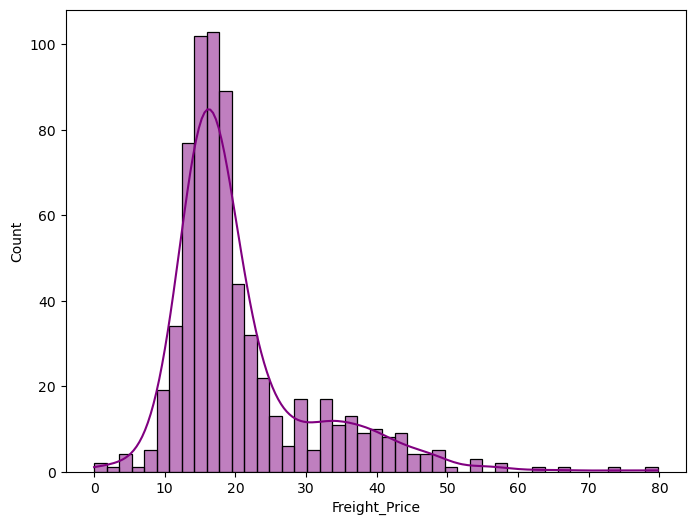

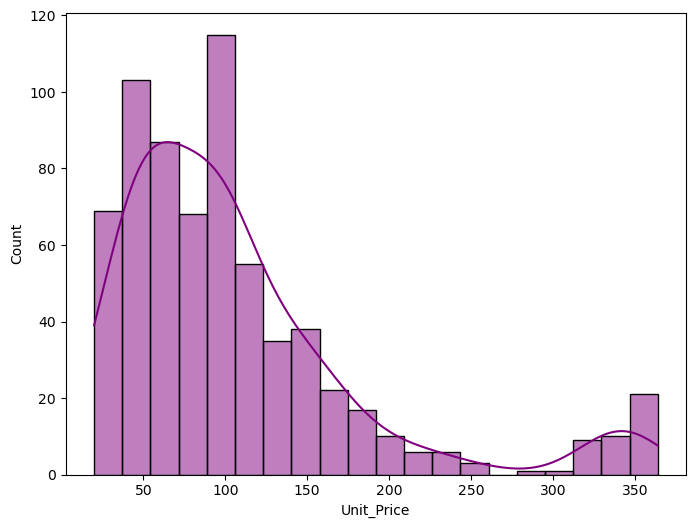

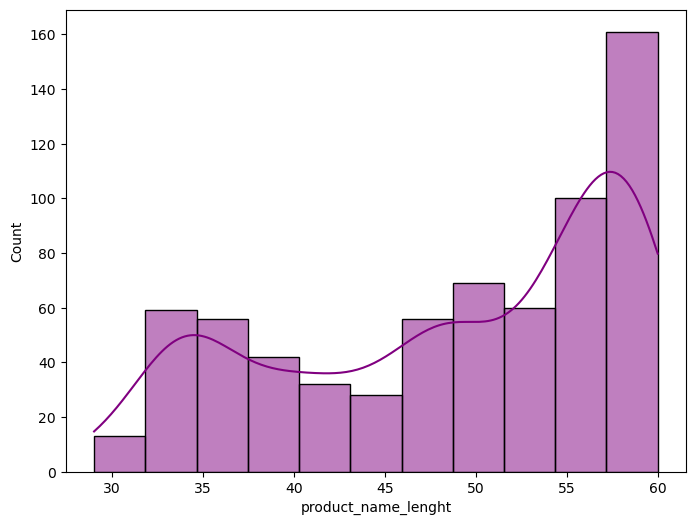

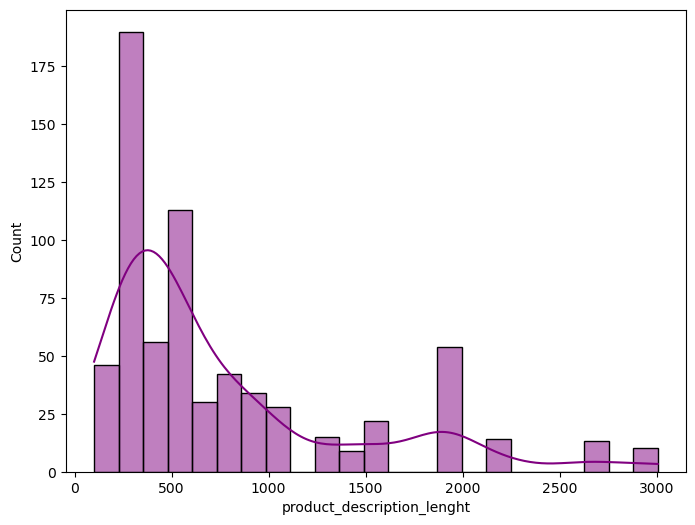

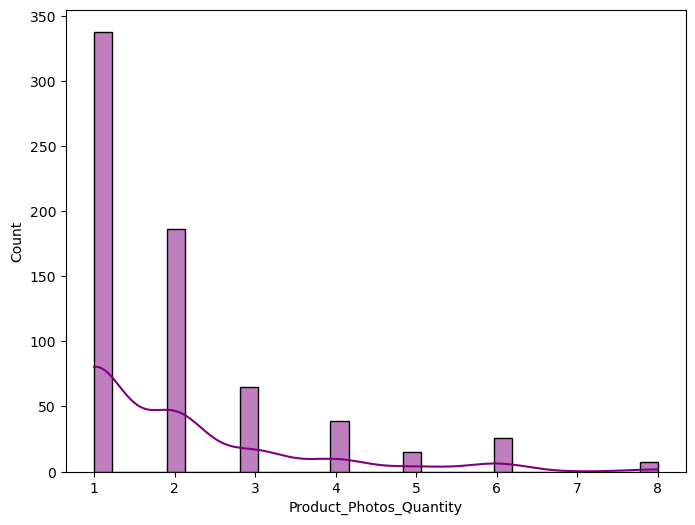

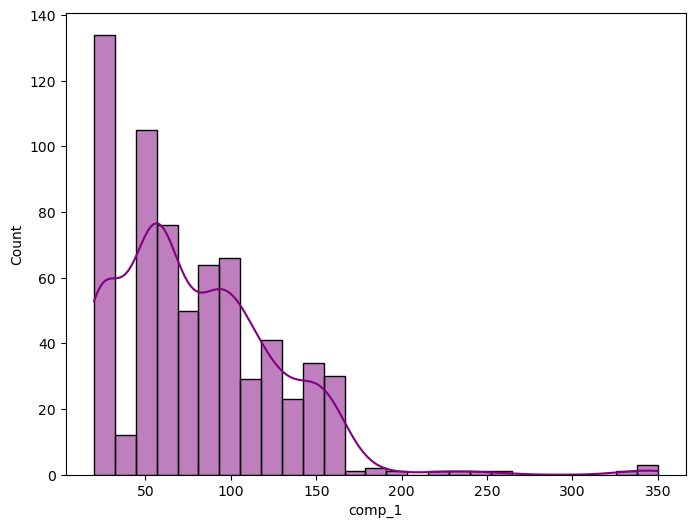

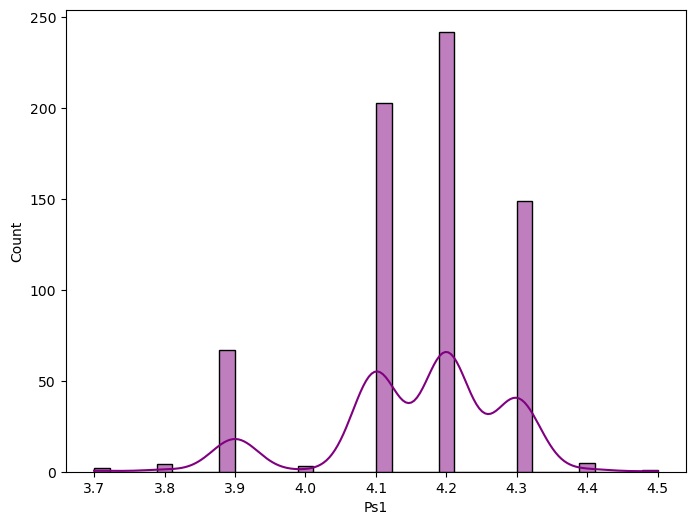

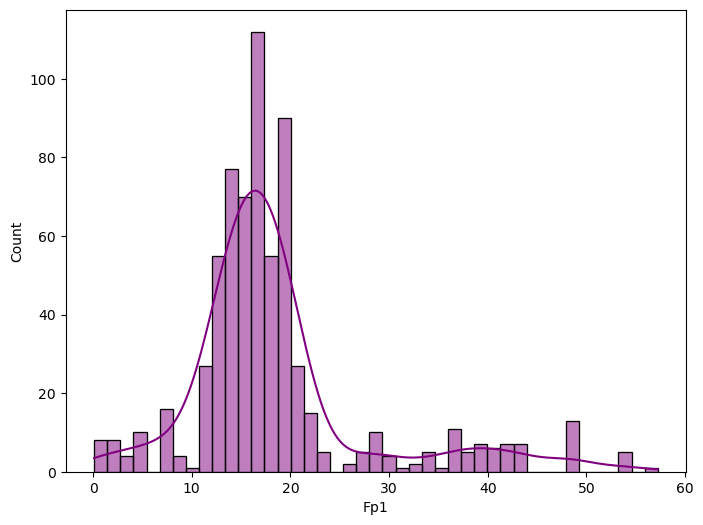

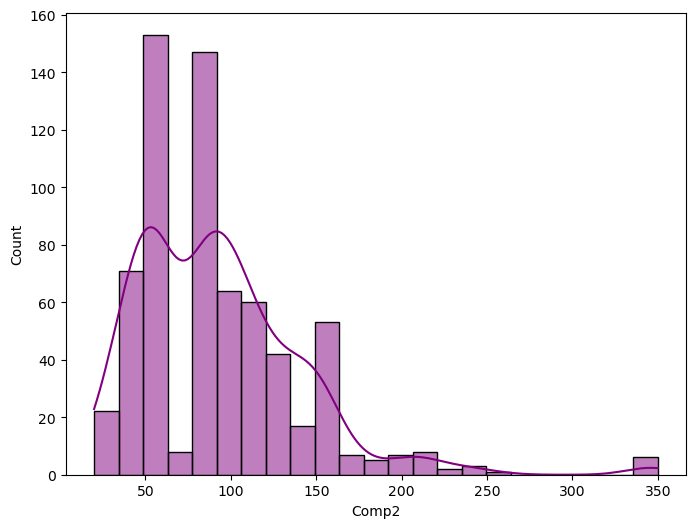

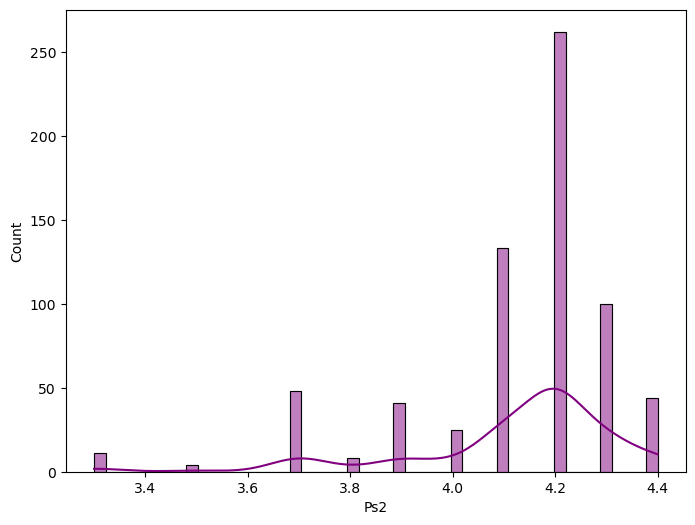

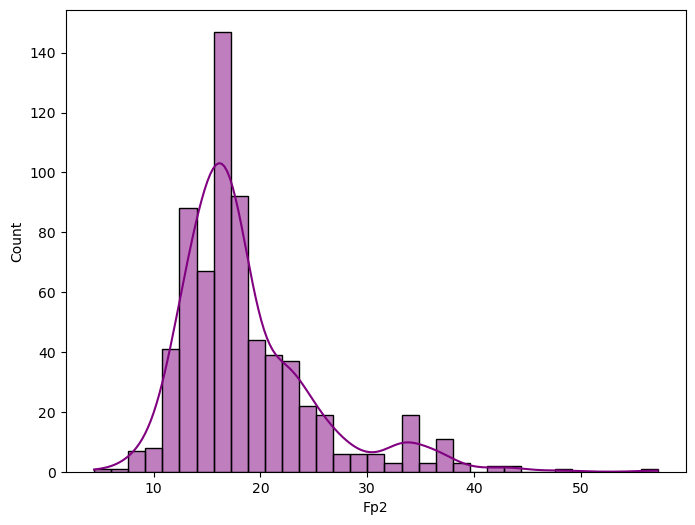

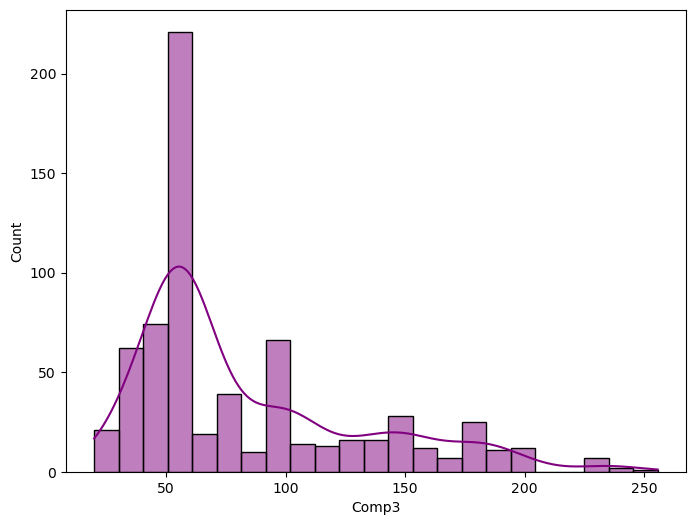

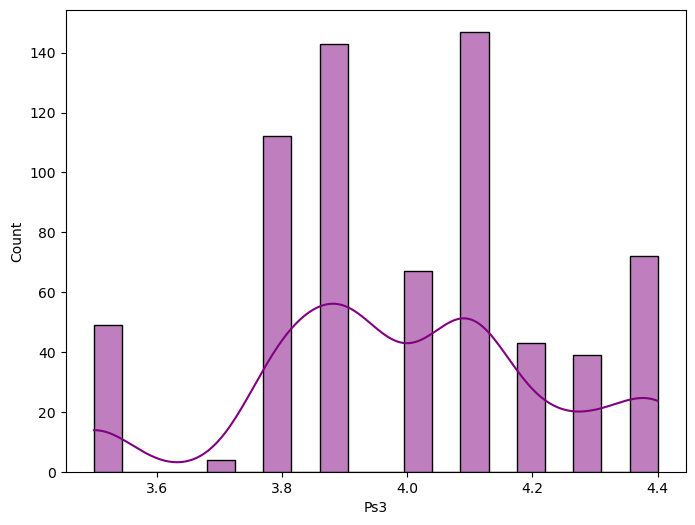

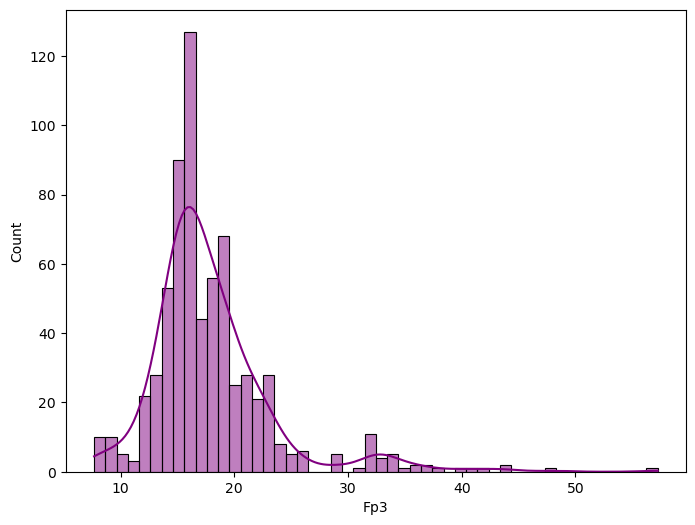

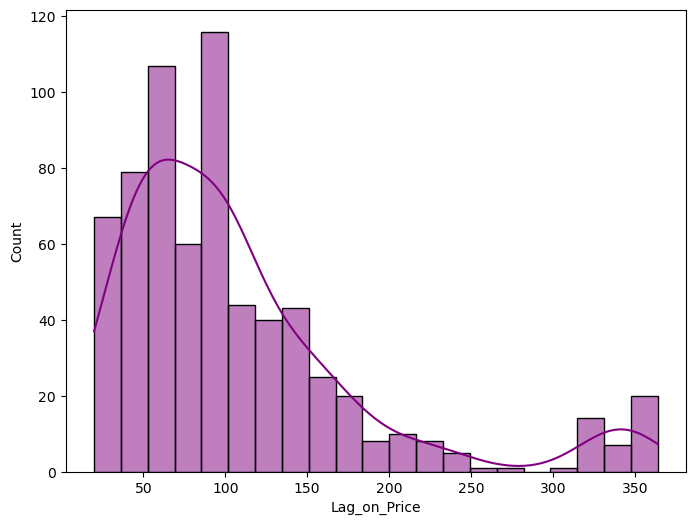

In [43]:
numerical_col=['Quantity','Total_Price','Freight_Price'	,'Unit_Price','product_name_lenght','product_description_lenght','Product_Photos_Quantity','comp_1','Ps1','Fp1','Comp2','Ps2','Fp2','Comp3','Ps3','Fp3','Lag_on_Price']
categorical_columns=['Gender','Marital_Status','Education_Level','Product_Interest','Income_Category']
for i in numerical_col:
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=df,color='purple',kde=True)
    plt.show()

#### **1.Quantity**
- This graph shows right skewness, indicating most quantities are low (near 0-20).
- The count is highest for quantities near 0, with frequencies decreasing as quantity increases.
- There is a long tail extending to higher quantities (up to 120), but with very low frequencies.

#### **2.Total price**
- The distribution is heavily skewed to the right, indicating most total prices are low (near 0-2000).
- The count is highest for total prices near 0, with frequencies decreasing as total price increases.
- There is a long tail extending to higher total prices (up to 12000), but with very low frequencies.

#### **3.Freight price**
- The distribution has a peak around 15-20, indicating most freight prices are in this range.
- The distribution is skewed to the right, with a long tail extending to higher freight prices (up to 80).
- Frequencies decrease as freight price increases beyond the peak.

#### **4.Unit Price**
- The distribution of unit prices peaks around 50-100, indicating many unit prices are in this range.
- There is a long tail extending to higher unit prices (up to 350), but with lower frequencies.
- A few unit prices are see high (around 300-350).

#### **5.Product name lenght**
- The count of unit prices increases for product name lengths near 60.
- Unit prices are distributed across product name lengths of 30-60, with varying counts.
- There is a significant peak for product name lengths near 60.

#### **6.Production description lenght**
- The count is highest for product description lengths near 0-500.
- Frequencies decrease as product description length increases beyond 500.
- There are instances of longer descriptions (up to 3000), but with lower frequencies.

#### **7.Product photos quantity**
- The count is highest for products with 1 photo.
- Frequencies decrease as the number of product photos increases beyond 1.
- Products with more than 2-3 photos are less common.

#### **8.Comp_1**
- The distribution is skewed to the right, indicating most values of  first compititer (comp_1) are highest (near 0-50).
- There is a long tail extending to higher values (up to 350), but with very low frequencies.

#### **9.Ps1**
- This graph shows the product ratio of first compititer.
- The distribution has shows peaks around 4.2 and 4.3, indicating higher counts at these values.

#### **10.Fp1**
- This graph shows the Freight price i.e shipping price of first compititer.
- The distribution peaks around 15-20, indicating many values of Fp1 are in this range.
- Counts vary across the range of Fp1 (0-60), with lower frequencies at higher values.

#### **11.Comp2**
- The distribution peaks around 50-100, indicating many values of second compititer are in this range.
- The distribution is skewed to the right, with a tail extending to higher values (up to 350).
- Frequencies decrease as values of Comp2 increase beyond 100.

#### **12.Ps2**
- This graph shows the product ratio of second compititer.
- The distribution has a peak around 4.2, indicating a high count at this value.
- Counts vary across the range of Ps2 (3.4-4.4), with some values having higher frequencies.

#### **13.Fp2**
- This graph shows the freight price/shipping price of second compititer.
- The distribution peaks around 15-20, indicating many values of Fp2 are in this range.
- The distribution is somewhat skewed to the right, with a tail extending to higher values (up to 50).
- Counts vary across the range of Fp2 (0-50), with lower frequencies at higher values.

#### **14.Comp3**
- The distribution peaks around 50, indicating many values of Comp3 are in this range.
- Frequencies decrease as values of Comp3 increase beyond 50.
- There is some spread to higher values (up to 250), but with low frequencies.

#### **15.Ps3**
- This graph shows the product ratio of third compititer.
- The distribution has peaks around certain values like 3.9 and 4.1.
- Counts vary across the range of Ps3 (3.6-4.4), with some values having higher frequencies.

#### **16.Fp3**
- This graph shows Freight price of third compititer.
- The distribution peaks around 15, indicating many values of Fp3 are in this range.
- The distribution is skewed to the right, with a tail extending to higher values (up to 50).
- Counts vary across the range of Fp3 (0-50), with lower frequencies at higher values.

#### **17.lag_on_price**
- The distribution peaks around 50-100, indicating many values of Lag_on_Price are in this range.
- Frequencies decrease as values of Lag_on_Price increase beyond 100.
- There are some counts at higher values (around 350).

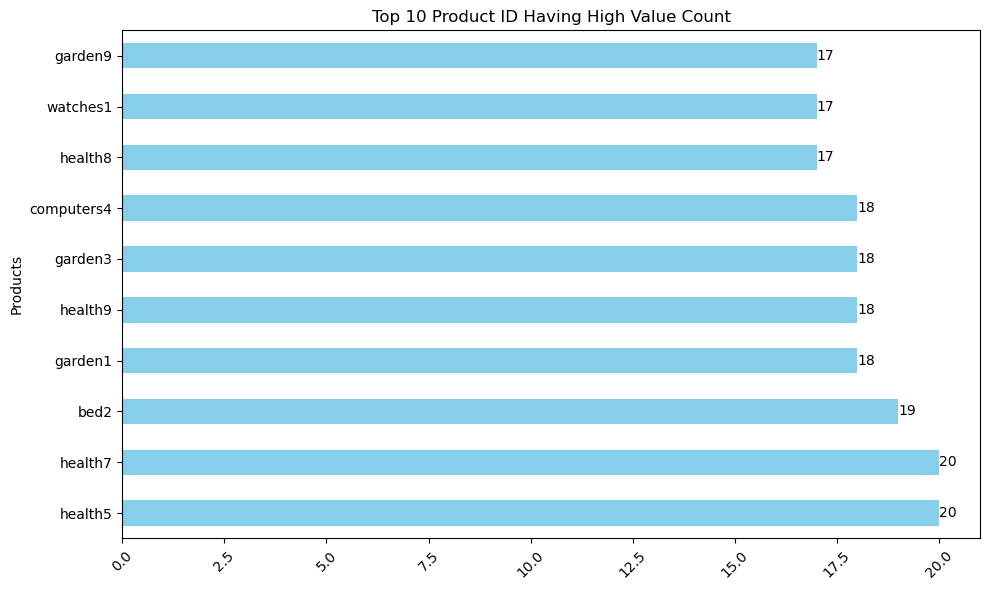

In [45]:
# top 10 product id  having high value count
prod_id=df['Product_ID'].value_counts().head(10)
ax=prod_id.plot(kind='barh',figsize=(10,6),color='skyblue')
plt.title('Top 10 Product ID Having High Value Count')
plt.ylabel('Products')
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

### **Top 10 Product ID Having High Value Count**
- In This graph shows the top 10 highest product id whose value count is high.
- The value count of 'garden9','watches1' and 'health8' this column is 17.
- The value count of 'computers4' , 'garden3','health9' and 'garden1' this column is 18.
- The value count of 'bed2' is 19.
- The value count of 'health7' and 'health5' is 20.

# Correlation 

## What is correlation ?
- Correlation refers to the relationship between two or more variables.
- It measure how changes in one variable are linked to the changes in another variable.
- It apply only numerical columns.

## Type of Correlation
**1.Positive correlation** :
- **The value range is (0-1).it indicates two variables are positively correlated.i.e one variable is increase other variable is also increase or decrease.**

**2.Negative correlation** :
- **value range is(-1 to 0) . it indicates the two variable are negatively correlated. if one variable is increase the other variable is decrease.**

**3.Zero / No correlation** :
- **value range is 0. it indicates there is no relationship between variables.**

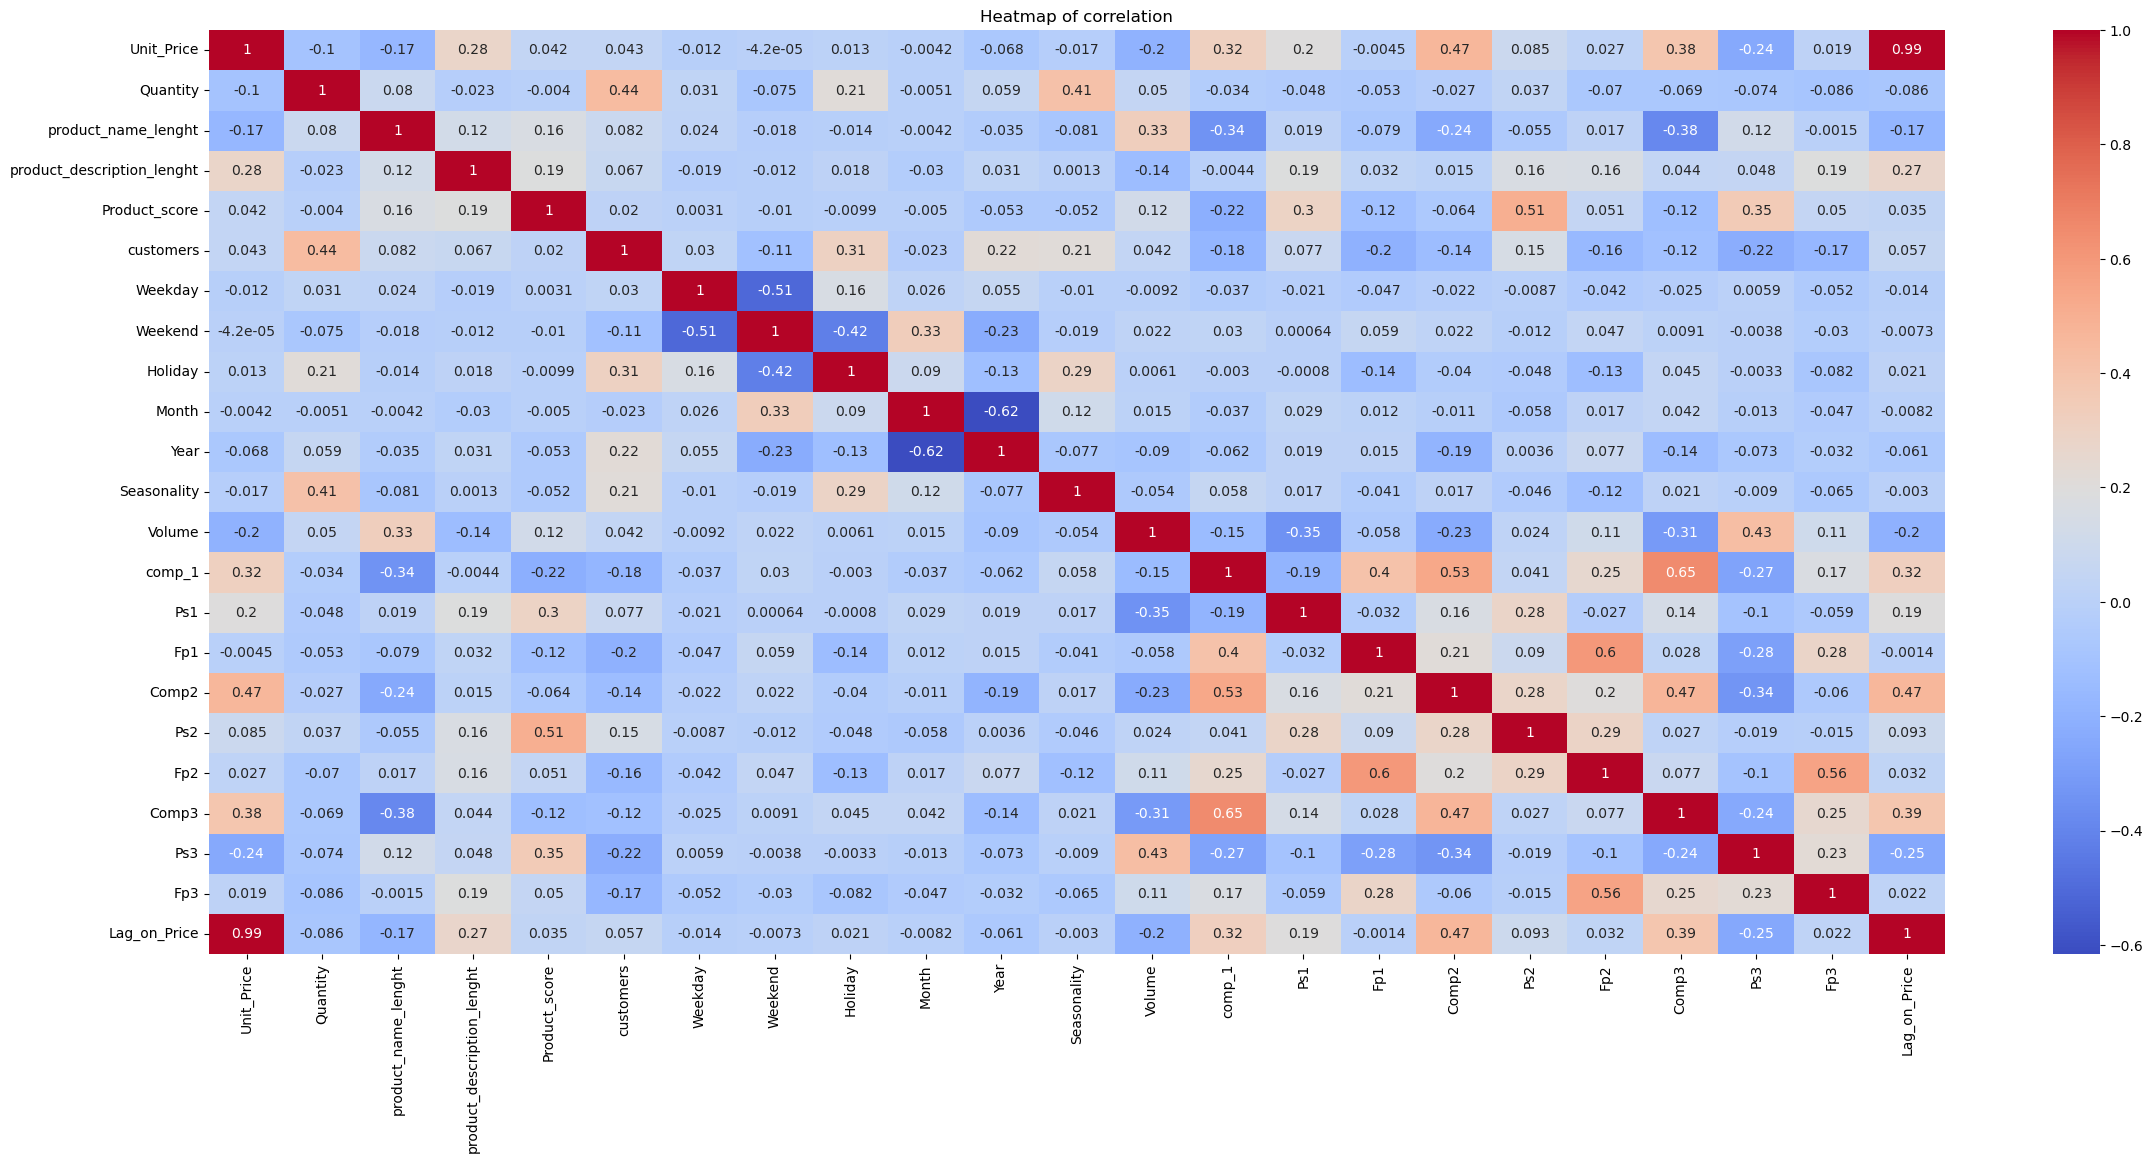

In [48]:
# correlation for discounted price,actual price,rating count,final price and rating
correlation=df[['Unit_Price','Quantity','product_name_lenght','product_description_lenght','Product_score','customers','Weekday','Weekend','Holiday','Month','Year','Seasonality','Volume','comp_1','Ps1','Fp1','Comp2','Ps2','Fp2','Comp3','Ps3','Fp3','Lag_on_Price']].corr() 
# print(correlation)
plt.figure(figsize=(28,12))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Heatmap of correlation')
plt.show()

- Every column is strongly correlated to itself,coefficient of correlation is 1. 
- 'Lag_on_Price' and 'Unit price' this two column are strongly correalted with other i.e there coefficient of correlation is close to 1 i.e 0.99.
- Some features are negativly correlated i.e their coefficient of correlation is -0.

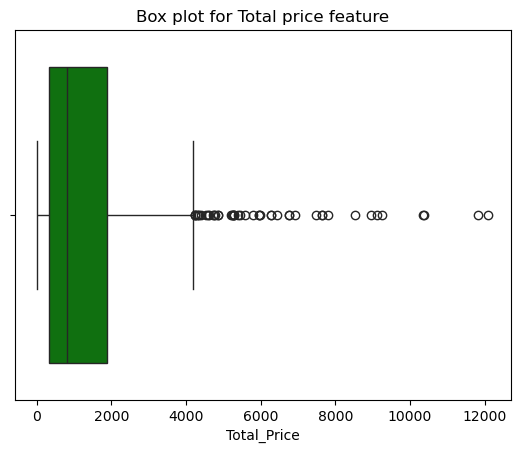

In [50]:
# boxplot for total price
plt.figure()
sns.boxplot(x=df['Total_Price'],color='green')
plt.title("Box plot for Total price feature")
plt.show()

- There are several outliers at higher total prices (above 4000, extending to around 12000).
- The median total price is relatively low, and the interquartile range (IQR) is mostly within the lower range of total prices.

In [52]:
import warnings
warnings.filterwarnings('ignore')

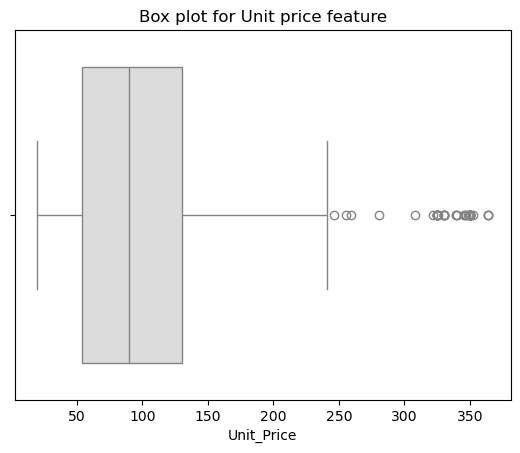

In [53]:
plt.figure()
sns.boxplot(x=df['Unit_Price'],palette='coolwarm')
plt.title("Box plot for Unit price feature")
plt.show()

- There are several outliers at higher unit prices (above 250).
- The median unit price is relatively low, and the bulk of unit prices are within a narrow range.

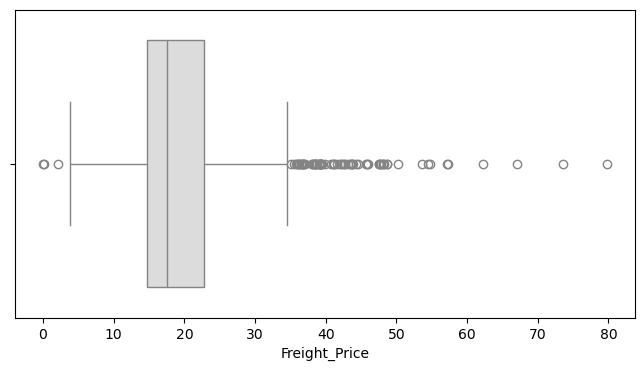

In [55]:
# box plot for freight price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Freight_Price'], palette='coolwarm')
plt.show()

1. Freight prices are mostly concentrated in a lower range (likely below 20).
2. There are several outliers at higher freight prices (above 30).
3. The median freight price is relatively low, and the bulk of freight prices are within a narrow range.

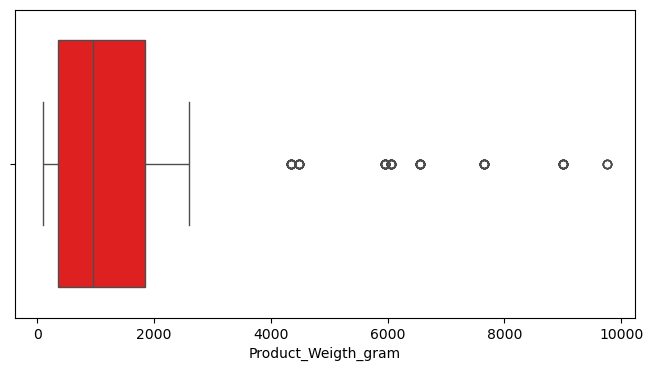

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Product_Weigth_gram'], color='red')
plt.show()

2. There are several outliers at much higher product weights (above 4000 grams).
3. The median product weight is relatively low.

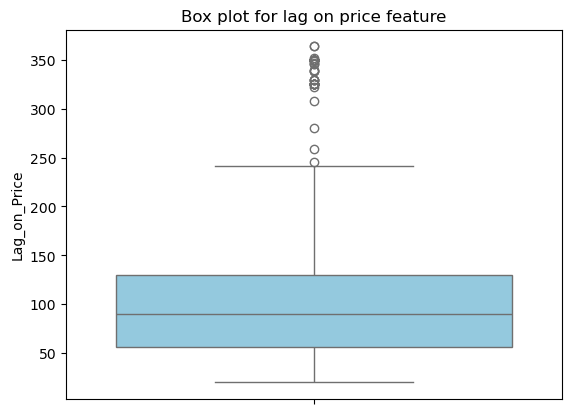

In [59]:
plt.figure()
sns.boxplot(y=df['Lag_on_Price'],color='skyblue')
plt.title("Box plot for lag on price feature")
plt.show()

- Values above approximately 225 are considered outliers.
- There are multiple outliers above 250, indicating extreme values in the "Lag_on_Price" feature.

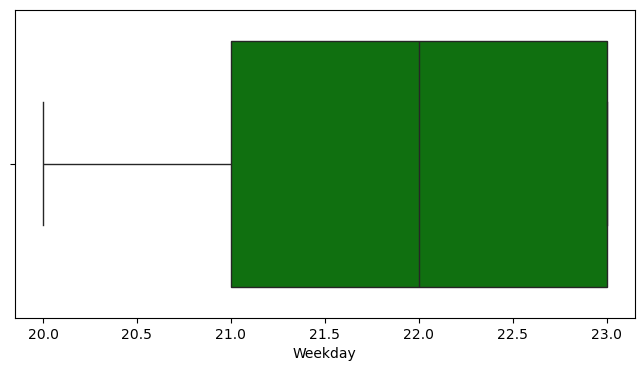

In [61]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Weekday'], color='green')
plt.show()

- There are no outlier present.

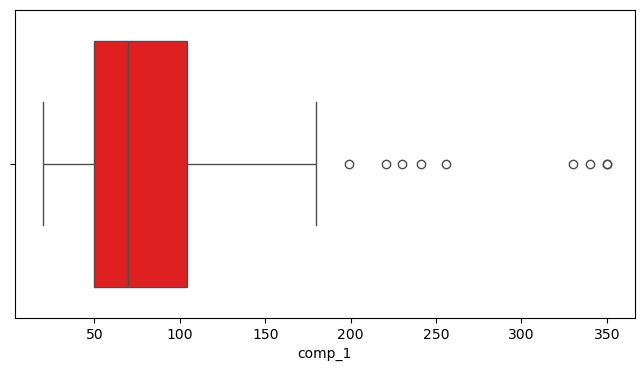

In [63]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['comp_1'], color='red')
plt.show()

- In first compititer  there are some outlier are present.

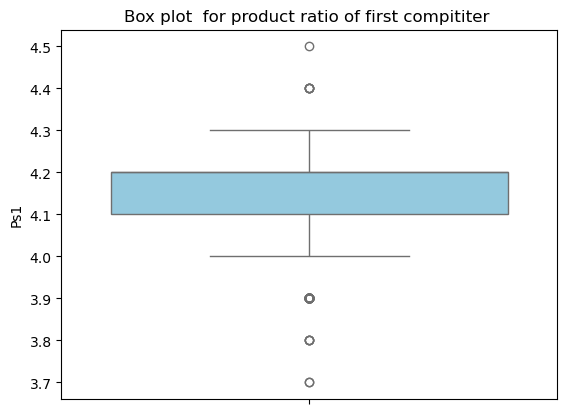

In [65]:
plt.figure()
sns.boxplot(y=df['Ps1'],color='skyblue')
plt.title("Box plot  for product ratio of first compititer ")
plt.show()

- There are some outlier present below the lower bound ( 3.7 to 3.9 ). and few outlier are present from 4.4 to 4.5.

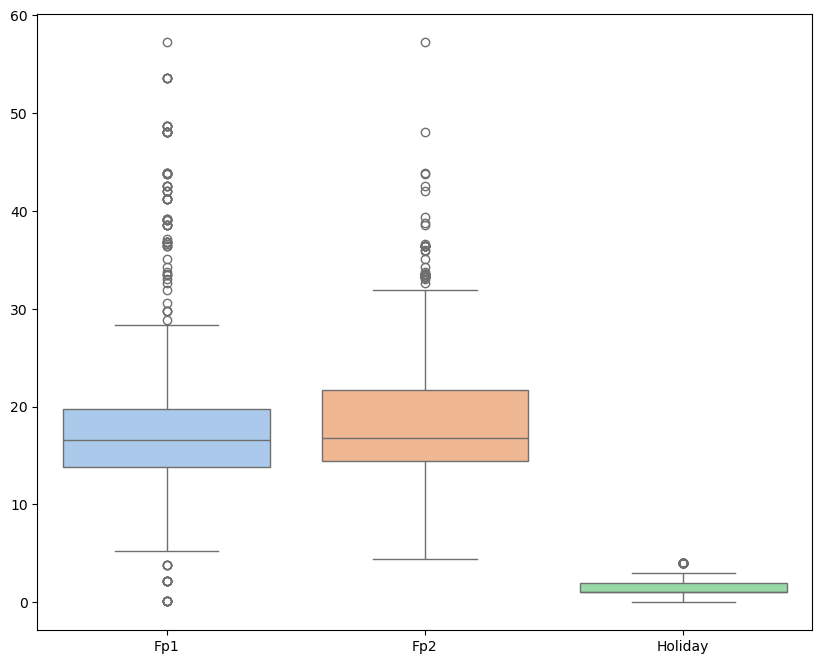

In [67]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Fp1', 'Fp2','Holiday']], palette='pastel')
plt.show()

- In freight price of first compititer some outlier are present below the lower bound. and extreme outlier are above the upper bound 30 to 59.
- In freight price of second compititer outlier are present above the upper bound 30.
- As compare to Fp1 and Fp2 in Holiday very low outlier is present.

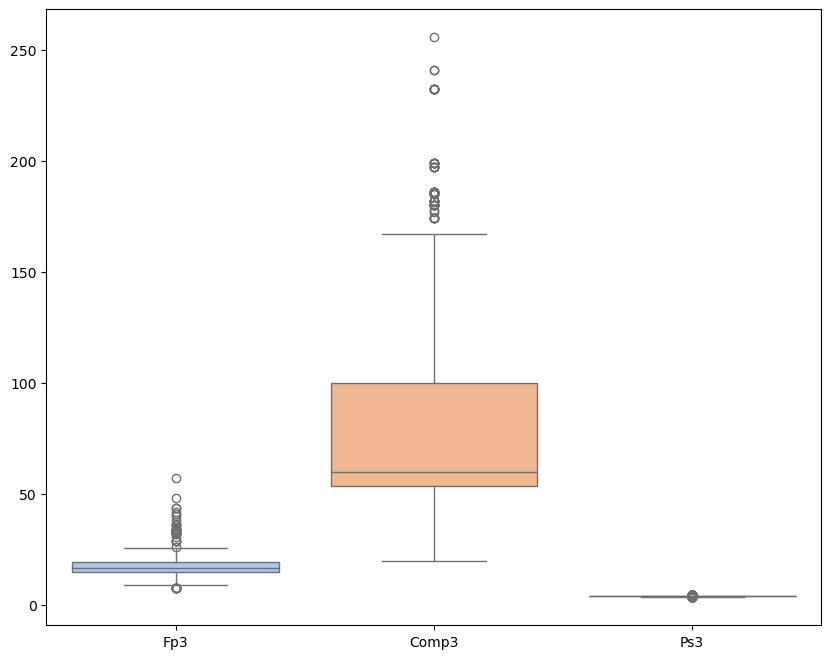

In [69]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Fp3', 'Comp3','Ps3']], palette='pastel')
plt.show()

- In Fp3 Values are generally low, with a narrow spread. A few outliers are present above the upper bound.
- In comp3 outlier are present above the upper bound.
- In Ps3 there are very low i.e close to 0 outlier are present.

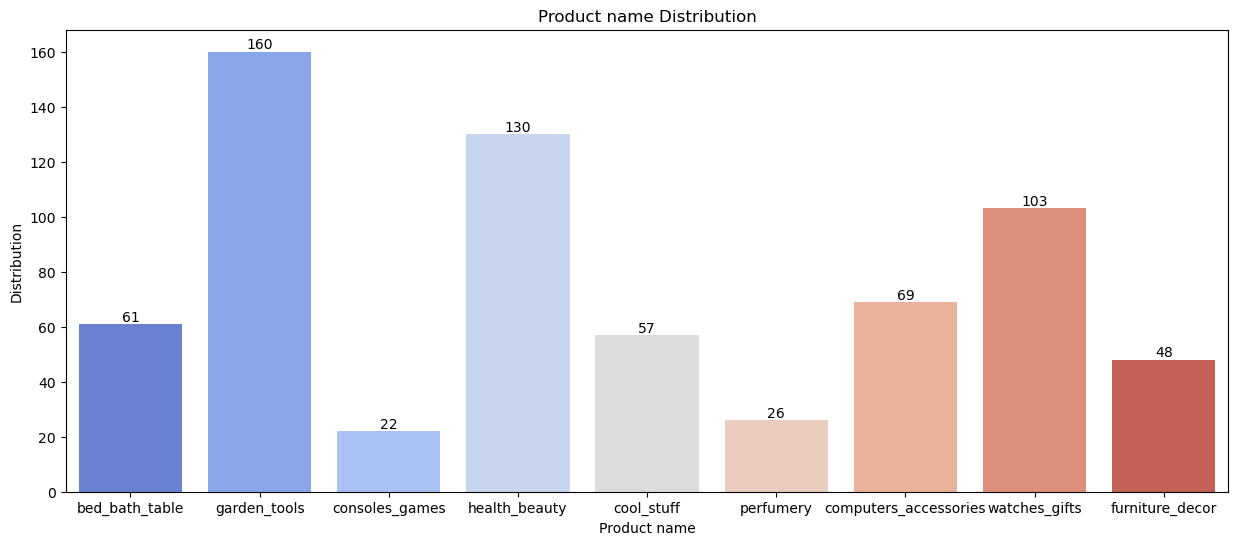

In [71]:
# count for product name
plt.figure(figsize=(15,6))
ax=sns.countplot(x=df['Product_Name'],palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Product name Distribution")
plt.xlabel("Product name")
plt.ylabel("Distribution")
plt.show()   

## **Product Name Distribution**
- The x-axis shows the all product name.
- The y-axis shows the Counts range starting from 0 to 160.
- The value of bed_bath_table is 61.
- The highest value count of 'garden_tools' is 160.
- The lowest value count of 'consoles_games' is 22.
- Value count of 'health_beauty' is 130.
- Value count of 'cool_stuff' is 57.
- Total count of 'perfume' product is 26.
- 'Computers_accessories' have 69 count.
- The  count of 'watches_gifts' product is 103.
- The total count of 'furniture_decor' items is 48.

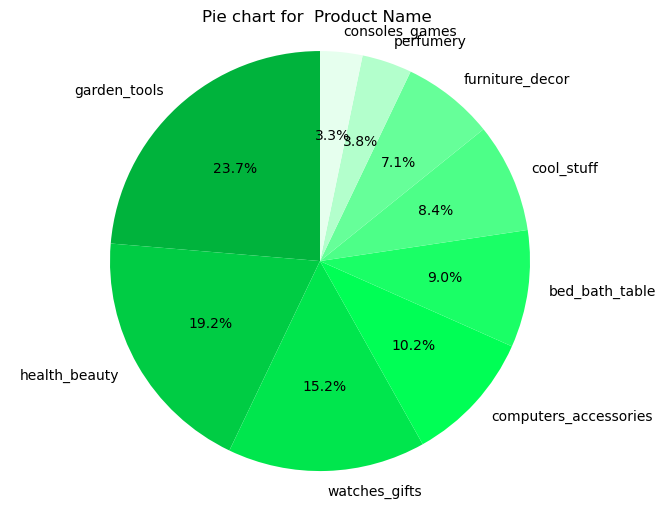

In [145]:
# pie chart of value_counts() of outcome
outcome_counts = df['Product_Name'].value_counts()
custom_colors = ['#00b33c','#00cc44','#00e64d','#00ff55','#1aff66','#4dff88','#66ff99','#b3ffcc','#e6ffee']
plt.figure(figsize=(8,6))
plt.pie(outcome_counts, labels = outcome_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Pie chart for  Product Name ')
plt.axis('equal')  
plt.show()

## Diatribution of Product Name
- 'garden_tools' with 23.7% have the largest share among the product category.
- The second largest distribution is 'health_beauty' product whose value is 19.2%.
- 'watches_gifts' product contributes 15.2% distribution.
- The 'computers_accessories' this products contributes 10.2%.
- 'bed_bath_table' have contributes the 9.0% distribution.
- 'cool_stuff' product  contributes 8.4% distribution.
- The 'furniture_decor' items have 3.8% distribution.
- The lowest distribution is 3.3% which is 'console_games' product.

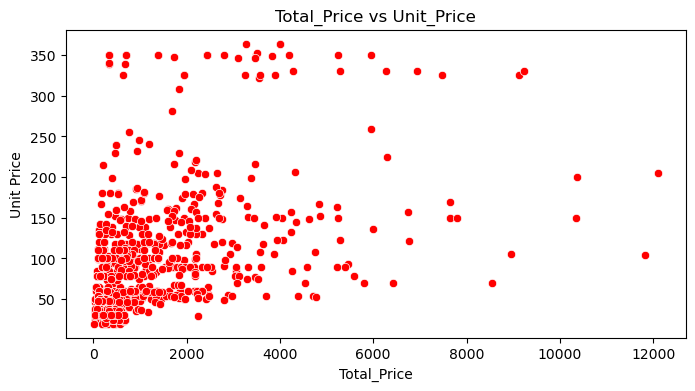

In [75]:
# sctter plot for total_price vs Unit price

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Total_Price', y='Unit_Price', color='red')
plt.title('Total_Price vs Unit_Price')
plt.xlabel('Total_Price')
plt.ylabel('Unit Price')
plt.show()


## Total_Price vs Unit_Price
- The x-axis represent  the Total price range start from 0 to 12000.
- Y-axis represent the unit price value start from 50 to 350.
- A majority of data points cluster are formed  lower Total_Price (near 0) and lower Unit_Price (below 150).
- Points are more spread out at higher Total_Price values (above 6000) and varying Unit_Price.(near350)


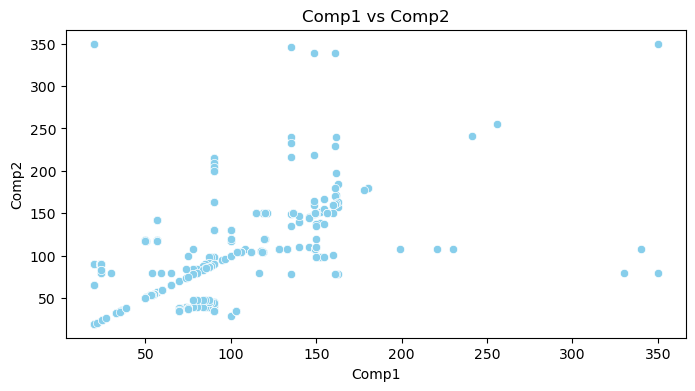

In [77]:
# scatter plot for compititer 1  vs compititer 2
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='comp_1', y='Comp2', color='skyblue')
plt.title('Comp1 vs Comp2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()

## Comp1 vs Com2
- This graph shows the comparision between first compititer and second compititer.
- There are cluster form between 50 to 150 .
- The points show a spread along a general positive trend.

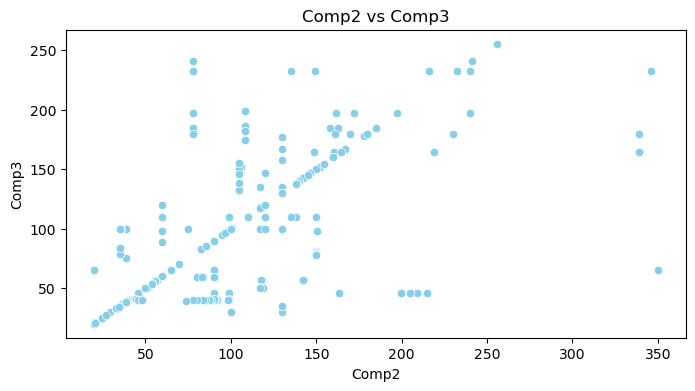

In [79]:
# scatter plot for compititer 1  vs compititer 2
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Comp2', y='Comp3', color='skyblue')
plt.title('Comp2 vs Comp3')
plt.xlabel('Comp2')
plt.ylabel('Comp3')
plt.show()

# Comp2 vs Comp3
- The x-axis show compititer 1 with range 0-350.
- The y-axis show compititer 2  with represent 0-250.
- Points are more concentrated in comp2 is between 50-200 and comp3 is between 50-150.
- Most data point are distributed across these ranges with a positive trend.

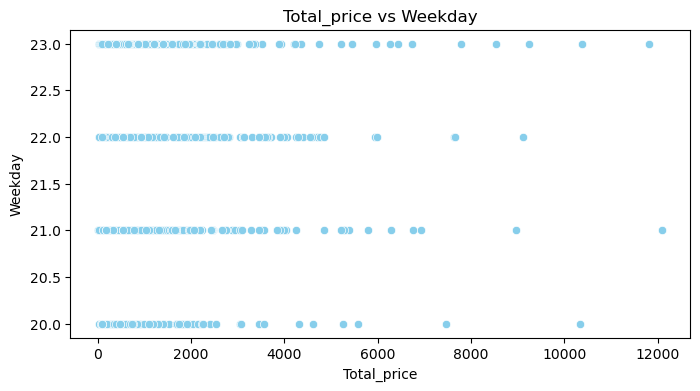

In [81]:
# scatter plot for total price  vs weekday
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Total_Price', y='Weekday', color='skyblue')
plt.title('Total_price vs Weekday')
plt.xlabel('Total_price')
plt.ylabel('Weekday')
plt.show()

# Total Price vs Weekday
- x-axis shows the day of week it take like monday=1,tuesday=2 like wise the value show around 20,21,21.5,22,22.5.
- Points are spread across various total price value for each weekday without a distinct trend. 

# Handling Outlier 

In [84]:
# haldle outlier which column have extreme outlier

Q1=df['Fp3'].quantile(0.25) # if data is 25% then it is Q1 
Q3=df['Fp3'].quantile(0.75) # if data is 75% then it is Q3

print(Q1,"\n",Q3) 

# IQR Finding
IQR=Q3-Q1
IQR

# finding upper limit
upper_limit=Q3+1.5*IQR  # formula for upper limit is Q3+1.5*IQR
print("Upper Limit ",upper_limit)

# lower limit
lower_limit=Q1-1.5*IQR  # lower limit = Q1-1.5*IQR
print("Lower Limit",lower_limit)

15.0427272725 
 19.44777778
Upper Limit  26.055353541249996
Lower Limit 8.435151511250002


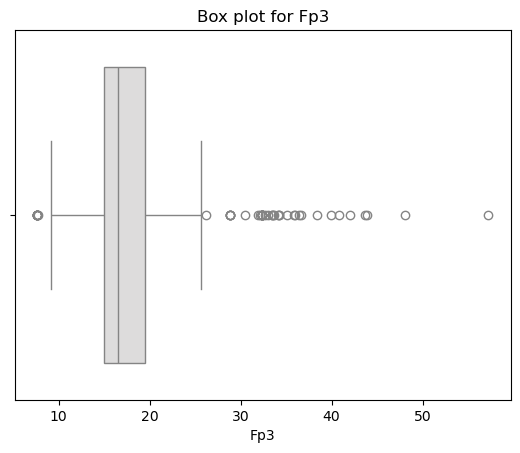

In [85]:
# boxplot after handling outlier
plt.figure()
sns.boxplot(x=df['Fp3'],palette='coolwarm')
plt.title("Box plot for Fp3")
plt.show()